# MCT4052 Workshop 1b: Features Extraction from MIDI Files

*Author: Stefano Fasciani, stefano.fasciani@imv.uio.no, Department of Musicology, University of Oslo.*

This brief example shows how to load and extract information from midi files using the package [pretty_midi](https://craffel.github.io/pretty-midi/).

The MIDI association between program number and istrument is defined in the [General MIDI standard](https://en.wikipedia.org/wiki/General_MIDI).


### 1. Importing packages and configuring options

In [2]:
#importing packages
import pretty_midi
import numpy as np
import mir_eval.display
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display

##### 

### 2. Loading MIDI file and displaying information

In [10]:
#loading midi and displaying info

#pm = pretty_midi.PrettyMIDI('./data/examples7/mz_333_2.mid')

pm = pretty_midi.PrettyMIDI('./data/examples6/kpop_HTX0172.mid')

print(pm.instruments)
print(len(pm.instruments))

print('')

#iterating over the instruments found in the MIDI dile and 
for instrument in pm.instruments:
    print(instrument.program)
    if instrument.is_drum:
        print('drum',instrument)
    else:
        print('other',instrument)

print('')
        
print('There are {} time signature changes'.format(len(pm.time_signature_changes)))
print('There are {} instruments'.format(len(pm.instruments)))

#displaying some info about individual instruments
for i in range(len(pm.instruments)):
    print('Instrument {} is program {}'.format(i,pretty_midi.program_to_instrument_name(pm.instruments[i].program)))
    print('Instrument {} has {} notes'.format(i,len(pm.instruments[i].notes)))
    print('Instrument {} has {} pitch bends'.format(i,len(pm.instruments[i].pitch_bends)))
    print('Instrument {} has {} control changes'.format(i,len(pm.instruments[i].control_changes)))
    print('')


[Instrument(program=65, is_drum=False, name="gangam style"), Instrument(program=0, is_drum=True, name="gangam style"), Instrument(program=30, is_drum=False, name="gangam style"), Instrument(program=81, is_drum=False, name="gangam style"), Instrument(program=39, is_drum=False, name="gangam style"), Instrument(program=81, is_drum=False, name="gangam style"), Instrument(program=63, is_drum=False, name="gangam style"), Instrument(program=53, is_drum=False, name="gangam style"), Instrument(program=50, is_drum=False, name="gangam style")]
9

65
other Instrument(program=65, is_drum=False, name="gangam style")
0
drum Instrument(program=0, is_drum=True, name="gangam style")
30
other Instrument(program=30, is_drum=False, name="gangam style")
81
other Instrument(program=81, is_drum=False, name="gangam style")
39
other Instrument(program=39, is_drum=False, name="gangam style")
81
other Instrument(program=81, is_drum=False, name="gangam style")
63
other Instrument(program=63, is_drum=False, name="g

Read more about [Standard MIDI-File Format](http://www.music.mcgill.ca/~ich/classes/mumt306/StandardMIDIfileformat.html).

In [17]:
#synthesizing the midi score
fs = 16000
IPython.display.Audio(pm.synthesize(fs=16000), rate=16000)

### 3. Extracting piano roll, chroma and pitch class

(128, 3375)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


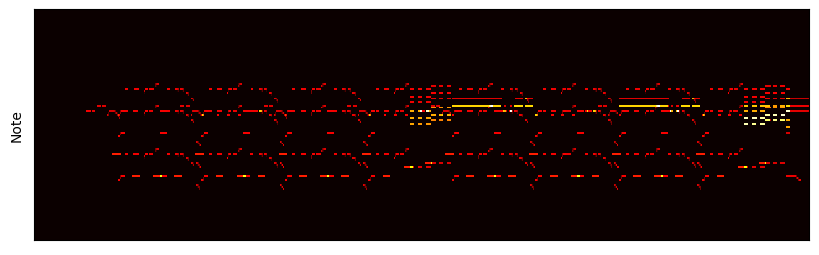

In [22]:
#getting and displaying piano roll (you can do this also on individual instruments)
piano_roll = pm.get_piano_roll()
print(piano_roll.shape)
print(piano_roll)
plt.figure(figsize=(10, 3))
librosa.display.specshow(piano_roll, y_axis='cqt_note', cmap=plt.cm.hot)

Text(0, 0.5, 'Proportion')

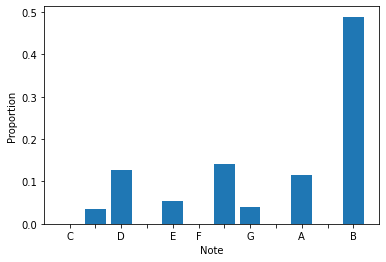

In [5]:
#getting and displaying histogram on individual instrument (can be also done overall)
hist = pm.get_pitch_class_histogram()
plt.bar(np.arange(12), hist);
plt.xticks(np.arange(12), ['C', '', 'D', '', 'E', 'F', '', 'G', '', 'A', '', 'B'])
plt.xlabel('Note')
plt.ylabel('Proportion')

(12, 3375)
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ... 105. 105.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ... 102. 102. 102.]]


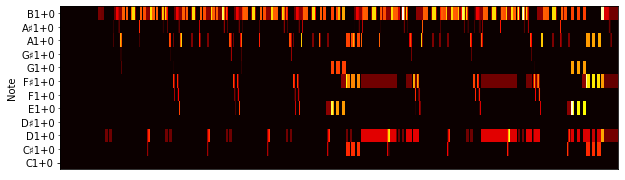

In [6]:
# getting and displaying the chroma vectors information
chroma = pm.get_chroma()
print(chroma.shape)
print(chroma)
plt.figure(figsize=(10, 3))
librosa.display.specshow(chroma, y_axis='cqt_note', cmap=plt.cm.hot)

### 4. Follow-up Activities

1. Try to extract the same information from a specific instrument rather than from the entire set of instruments.
2. Try to extract the  same information from a limited time range.
3. Try to extract the tempo using pretty_midi.
4. Try to extract and visualize different features, such as the get_pitch_class_transition_matrix.
5. Try the [utilities](https://craffel.github.io/pretty-midi/) such as those converting note number to name, note number to Hz, and note number to drum name.

### 8. For your project

These tutorial shows a more extensive and advanced use of the pretty_midi library (not everything will be relevant to Machine Learning): ([tutorial 1](https://github.com/craffel/pretty-midi/blob/master/Tutorial.ipynb), [tutorial 2](https://nbviewer.jupyter.org/github/craffel/midi-dataset/blob/master/Tutorial.ipynb)), in which you find further useful code snippets.

The package [mir_eval](https://github.com/craffel/mir_eval) can be useful to further mine data extracted from MIDI.